# Importance of Environmental Concerns

## Exploring Public Opinion

In this chapter, we will analyze the responses from the World Values Survey related to environmental issues. 

Specifically, we will focus on four key questions that reflect people's attitudes and willingness to support environmental action:

Would give part of my income for the environment (B001): Analyzing how willing individuals are to personally contribute financially to environmental protection.
Increase in taxes if used to prevent environmental pollution (B002): Understanding public support for increasing taxes to fund environmental pollution prevention.
Government should reduce environmental pollution (B003): Assessing public opinion on whether it is the government's responsibility to take action against pollution.
Protecting environment vs. Economic growth (B008): Exploring the balance people believe should be struck between environmental protection and economic growth.

Through visualizations and trend analysis, we will uncover how these attitudes have evolved over time across different countries and demographics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the CSV file
WVS = pd.read_csv('data/data.csv')


In [2]:
# Filter data for specified countries using COUNTRY_ALPHA
selected_countries_alpha = ['AUS', 'CAN', 'CHN', 'RUS', 'DEU','CHE', 'USA']

# Environmental concern variables
env_vars = [
    # "A071", 
    # "A088",
    # "A103", 
    "B001", 
    "B002", 
    "B003", 
    "B008", 
    # "B009", 
    # "B030", 
    # "B031", 
    # "E136", 
    # "E069_14"
]

env_var_mapping = [
    # {'A071': 'Member: Belong to conservation, the environment, ecology, animal rights'},
    # {'A088': 'Voluntary work: Unpaid work environment, conservation, animal rights'},
    # {'A103': 'Active/Inactive membership of environmental organization'},
    {'B001': 'Would give part of my income for the environment'},
    {'B002': 'Increase in taxes if used to prevent environmental pollution'},
    {'B003': 'Government should reduce environmental pollution'},
    {'B008': 'Protecting environment vs. Economic growth'},
    # {'B009': 'Human & nature'},
    # {'B030': 'Past two years: given money to ecological organization'},
    # {'B031': 'Past two years: participated in demonstration for environment'},
    # {'E136': 'Who should decide: protection of the environment'},
    # {'E069_14': 'Confidence: The Environmental Protection Movement'}
]
# Filter and process data
valid_waves = [1, 2, 3, 4, 5, 6, 7]

Data Preprocessing

In [3]:
# Aggregate responses for each variable
aggregated_data = {}
for var in env_vars:
    aggregated_data[var] = WVS[var].value_counts().sort_index()

# Plot the aggregated data
# plt.figure(figsize=(12, 8))
# for var in env_vars:
#     sns.barplot(x=aggregated_data[var].index, y=aggregated_data[var].values, label=var)

# plt.title("Aggregated Responses for Environmental Concern Variables", fontsize=16)
# plt.xlabel("Response Value", fontsize=14)
# plt.ylabel("Count", fontsize=14)
# plt.legend(title="Variables", loc="upper right")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


Transforming data and Aggregating

In [4]:
transformed_data = {}

for var in env_vars:
    # Explicitly filter out non-positive values
    positive_values = WVS[var][WVS[var] > 0]
    
    # Reverse the scale (4 becomes best, 1 becomes worst)
    reversed_scale = positive_values.apply(lambda x: 5 - x if x > 0 else pd.NA)
    
    # Aggregate transformed responses
    transformed_data[var] = reversed_scale.value_counts().sort_index()

# Define a custom color palette
custom_palette = sns.color_palette("Set2", len(env_vars))

# Create a DataFrame for plotting
plot_data = pd.DataFrame(transformed_data).fillna(0).reset_index()
plot_data = plot_data.melt(id_vars='index', var_name='Variable', value_name='Count')
plot_data.rename(columns={'index': 'Response Value'}, inplace=True)

# Ensure only valid response values (1-4) are plotted
plot_data = plot_data[plot_data['Response Value'].isin([1, 2, 3, 4])]

# Plot the data as grouped bars with a custom color palette
# plt.figure(figsize=(14, 8))
# sns.barplot(
#     data=plot_data, 
#     x='Response Value', 
#     y='Count', 
#     hue='Variable', 
#     dodge=True,
#     palette=custom_palette  # Apply the custom palette
# )

# plt.title("Transformed and Aggregated Responses for Environmental Concern Variables", fontsize=16)
# plt.xlabel("Transformed Response Value (4=Best, 1=Worst)", fontsize=14)
# plt.ylabel("Count", fontsize=14)
# plt.legend(title="Variables", loc="upper right")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



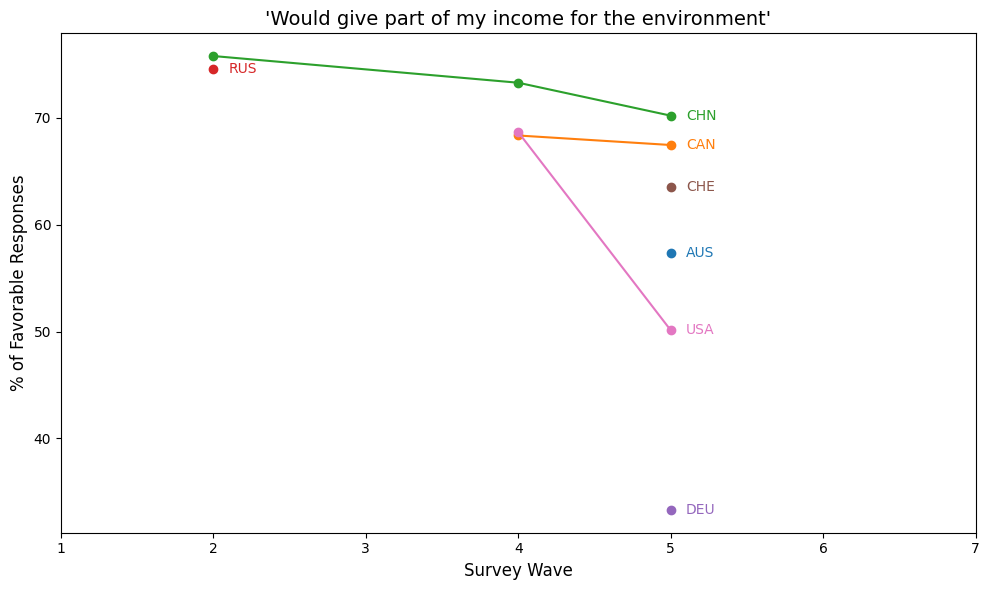

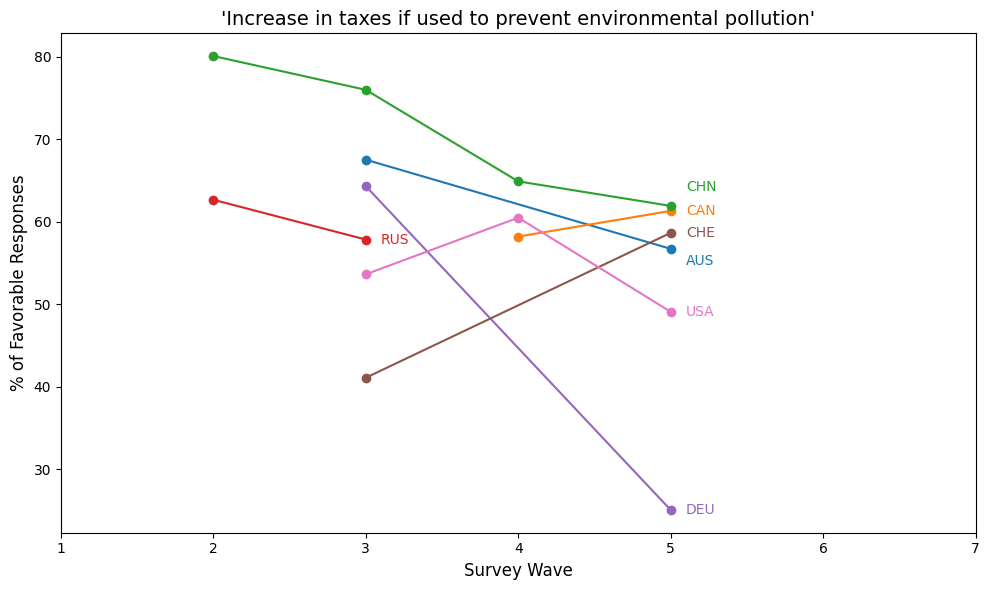

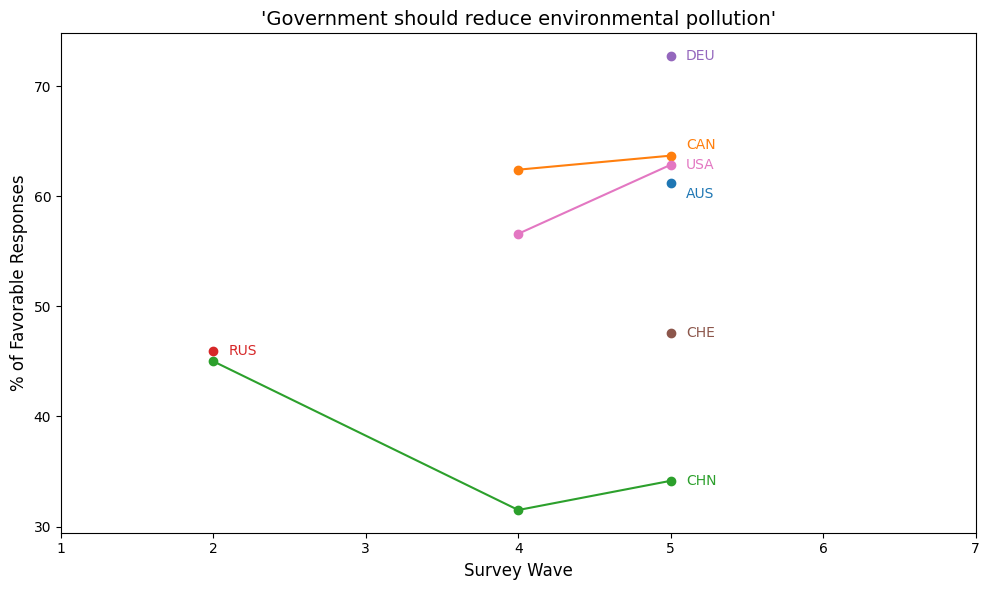

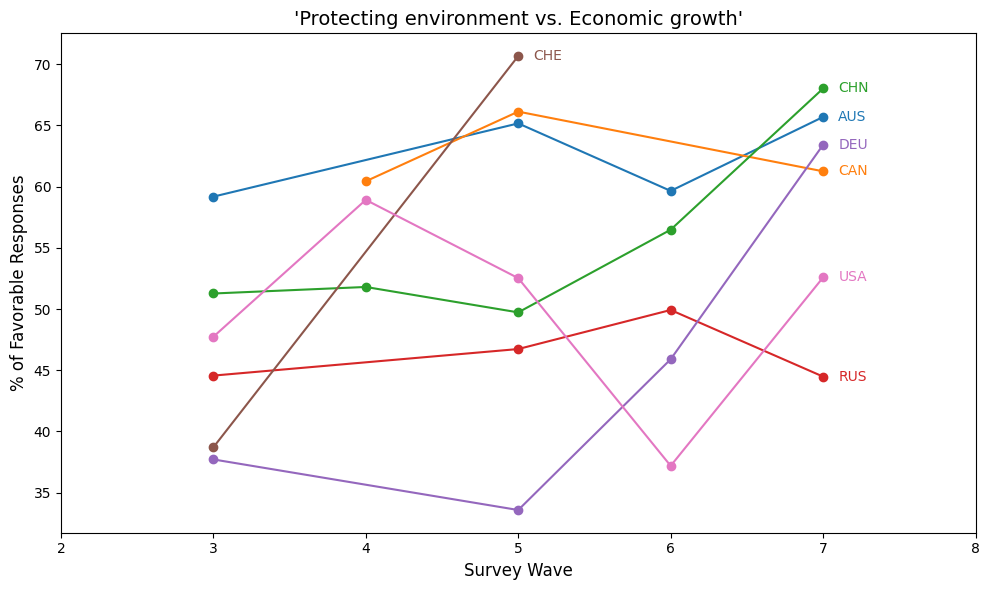

In [5]:
trend_data_list = []

# Process each variable
for var in env_vars:
    # Define wave range based on variable
    waves_to_include = range(2, 9) if var == "B008" else valid_waves
    
    for country in selected_countries_alpha:
        for wave in waves_to_include:
            # Filter data for the specific variable, country, and wave
            wave_data = WVS[
                (WVS['COUNTRY_ALPHA'] == country) & 
                (WVS['S002VS'] == wave)
            ]
            total_respondents = len(wave_data)
            
            # Skip waves with no respondents
            if total_respondents == 0:
                continue

            # Filter only positive responses
            positive_responses = wave_data[var][wave_data[var] > 0]

            # Reverse the scale
            transformed_responses = positive_responses.apply(lambda x: 5 - x if pd.notna(x) else pd.NA)
            
            # Count favorable responses
            if var == "B008":
                # Special case: Only answers of 4
                favorable_count = transformed_responses[transformed_responses == 4].count()
            else:
                # General case: Include 3 and 4
                favorable_count = transformed_responses[transformed_responses.isin([3, 4])].count()
            
            # Skip if there are no favorable responses
            if favorable_count == 0:
                continue
            
            # Calculate percentage of favorable responses
            percentage_favorable = (favorable_count / total_respondents) * 100  # Convert to percentage
            
            # Add the result to the trend data
            trend_data_list.append({
                "Variable": var,
                "Country": country,
                "Wave": wave,
                "Percentage_Favorable": percentage_favorable
            })

# Convert the list of dictionaries to a DataFrame
trend_data = pd.DataFrame(trend_data_list)

# Plot trends for each variable
for var in env_vars:
    plt.figure(figsize=(10, 6))  # Individual plot size
    var_data = trend_data[trend_data['Variable'] == var]
    
    for country in selected_countries_alpha:
        country_data = var_data[var_data["Country"] == country]
        if country_data.empty:  # Skip countries with no data
            continue
        
        # Plot line and marker
        line, = plt.plot(
            country_data["Wave"],
            country_data["Percentage_Favorable"],
            marker='o',
            label=None  # Remove default legend
        )
        
        # Add country name at the last data point
        last_point = country_data.iloc[-1]
        x_offset = 0.1  # Default x offset
        y_offset = 0  # Default y offset

        # Apply custom offsets
        if var == "B002" and country == "CHN":
            y_offset += 2.3
        if var == "B002" and country == "AUS":
            y_offset -= 1.5
        if var == "B003" and country == "CAN":
            y_offset += 1
        if var == "B003" and country == "AUS":
            y_offset -= 1

        # Add text with custom offset
        plt.text(
            last_point["Wave"] + x_offset,  # Offset x slightly to avoid overlap
            last_point["Percentage_Favorable"] + y_offset,
            country,
            fontsize=10,
            color=line.get_color(),
            va='center'
        )
    
    # Customize each plot
    variable_name = next((mapping[var] for mapping in env_var_mapping if var in mapping), var)
    plt.title(f"'{variable_name}'", fontsize=14)
    plt.xlabel("Survey Wave", fontsize=12)
    plt.ylabel("% of Favorable Responses", fontsize=12)
    plt.xticks(range(2, 9) if var == "B008" else valid_waves)  # Ensure integer x-axis ticks
    plt.grid(False)

    plt.tight_layout()
    plt.show()


### Graph 1: Would give part of my income for the environment
Countries like CHN (China) and CAN (Canada) show relatively stable but decreasing trends over the waves.
RUS (Russia) starts higher in favorable responses but appears to dip slightly.
Interestingly, USA (United States) demonstrates a sharp drop in favorable responses in Wave 5, suggesting a potential shift in public attitudes.
The differences among countries highlight the varying levels of willingness to financially contribute to environmental causes.
### Graph 2: Increase in taxes if used to prevent environmental pollution
CHN continues to lead in favorable responses, showing a downward trend but remaining strong compared to other countries.
RUS and USA showcase a consistent decline, while DEU (Germany) fluctuates significantly, ending with relatively lower percentages.
This graph reveals hesitancy or changing attitudes about taxes as a means of addressing environmental issues, especially in Western countries.
### Graph 3: Government should reduce environmental pollution
CHN and CAN show higher consistent support, indicating strong public pressure for governmental action on pollution.
RUS starts high but drops, whereas USA and AUS (Australia) remain stable but show moderate support.
The results indicate that despite regional differences, there’s a general expectation for governments to play an active role in reducing pollution.
### Graph 4: Protecting environment vs. Economic growth
CHE (Switzerland) exhibits a dramatic rise in favorable responses, standing out from other countries.
CHN and DEU also show steady growth, aligning with increasing environmental priorities.
RUS and USA fluctuate but maintain a lower trajectory.
This graph underscores a growing acknowledgment of prioritizing environmental protection over economic growth, though regional disparities persist.
### General Observations:
China (CHN) emerges as a leader in favorable responses across all variables, reflecting a strong public sentiment toward environmental action.
USA shows inconsistent support, with noticeable declines in specific variables.
European countries (CHE, DEU) demonstrate variability but generally show positive trends in prioritizing environmental concerns.
Economic Considerations: The variable "Protecting environment vs. Economic growth" highlights the balancing act between environmental priorities and economic development, where some countries are increasingly favoring the former.
### Insights:
The varying trajectories indicate cultural, economic, and policy-related differences among countries.
Factors like political climate, economic stability, and public awareness likely influence these trends.
Further analysis could dive into the factors contributing to the significant rises or dips in specific countries and waves.

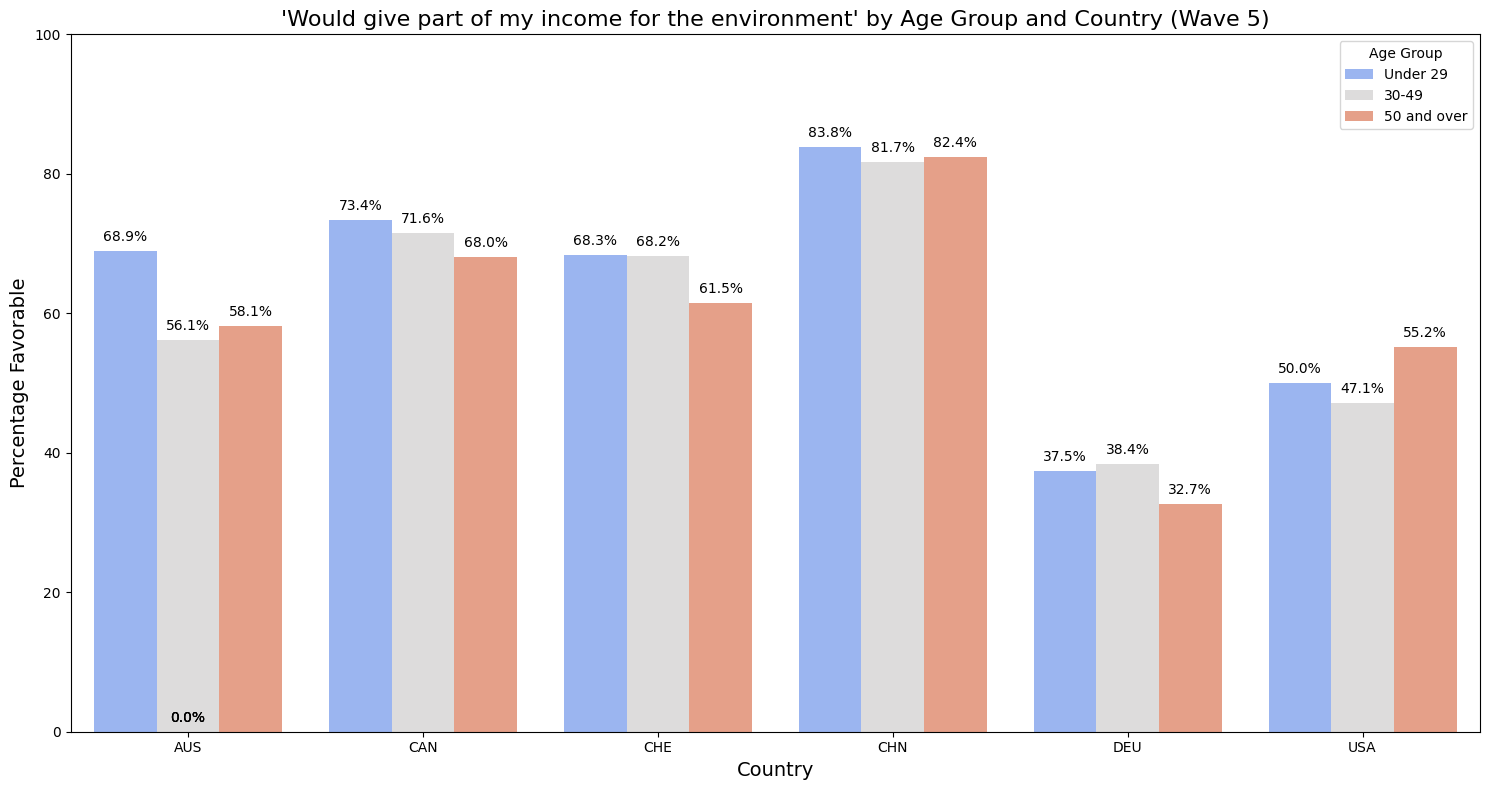

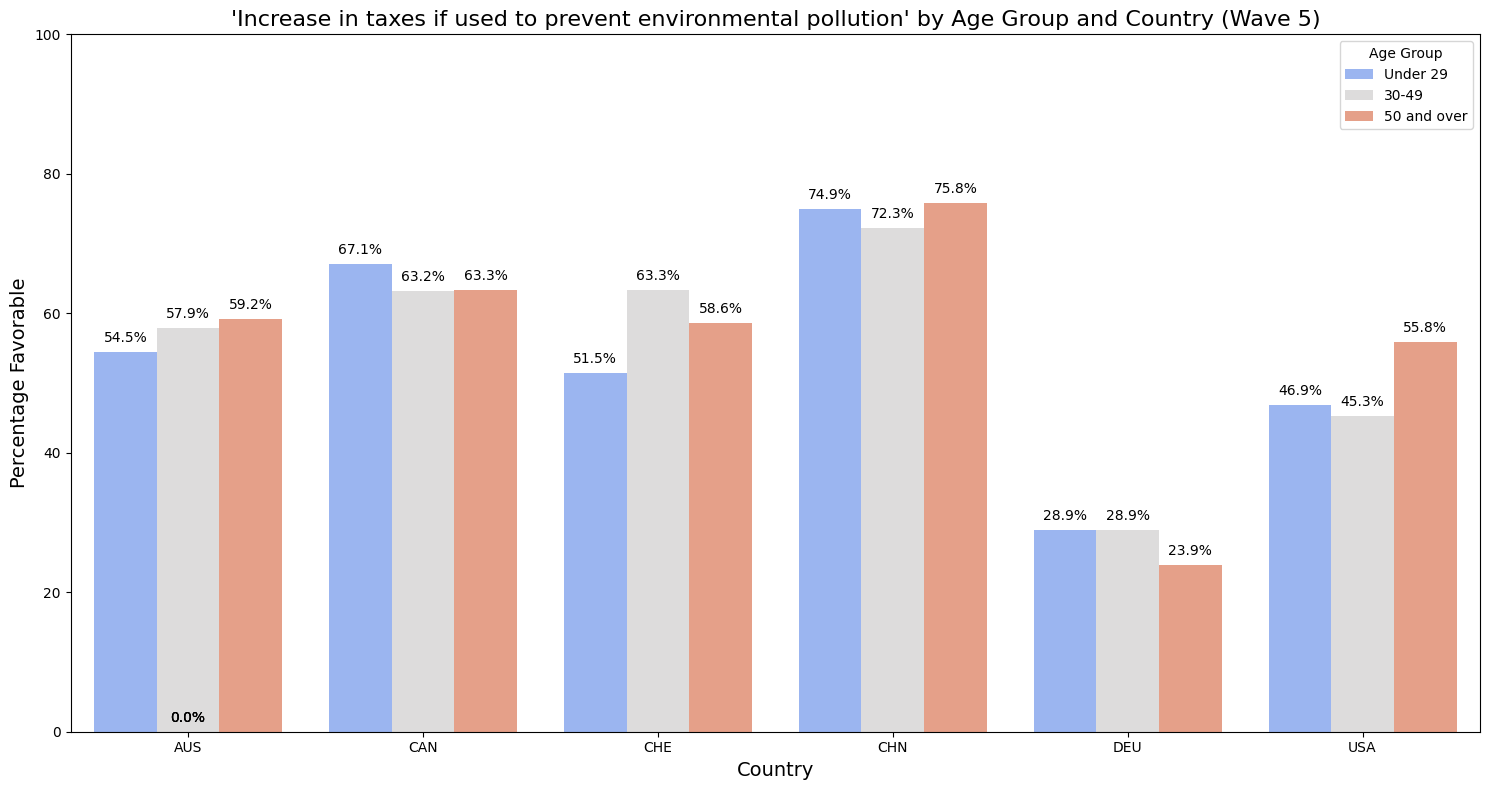

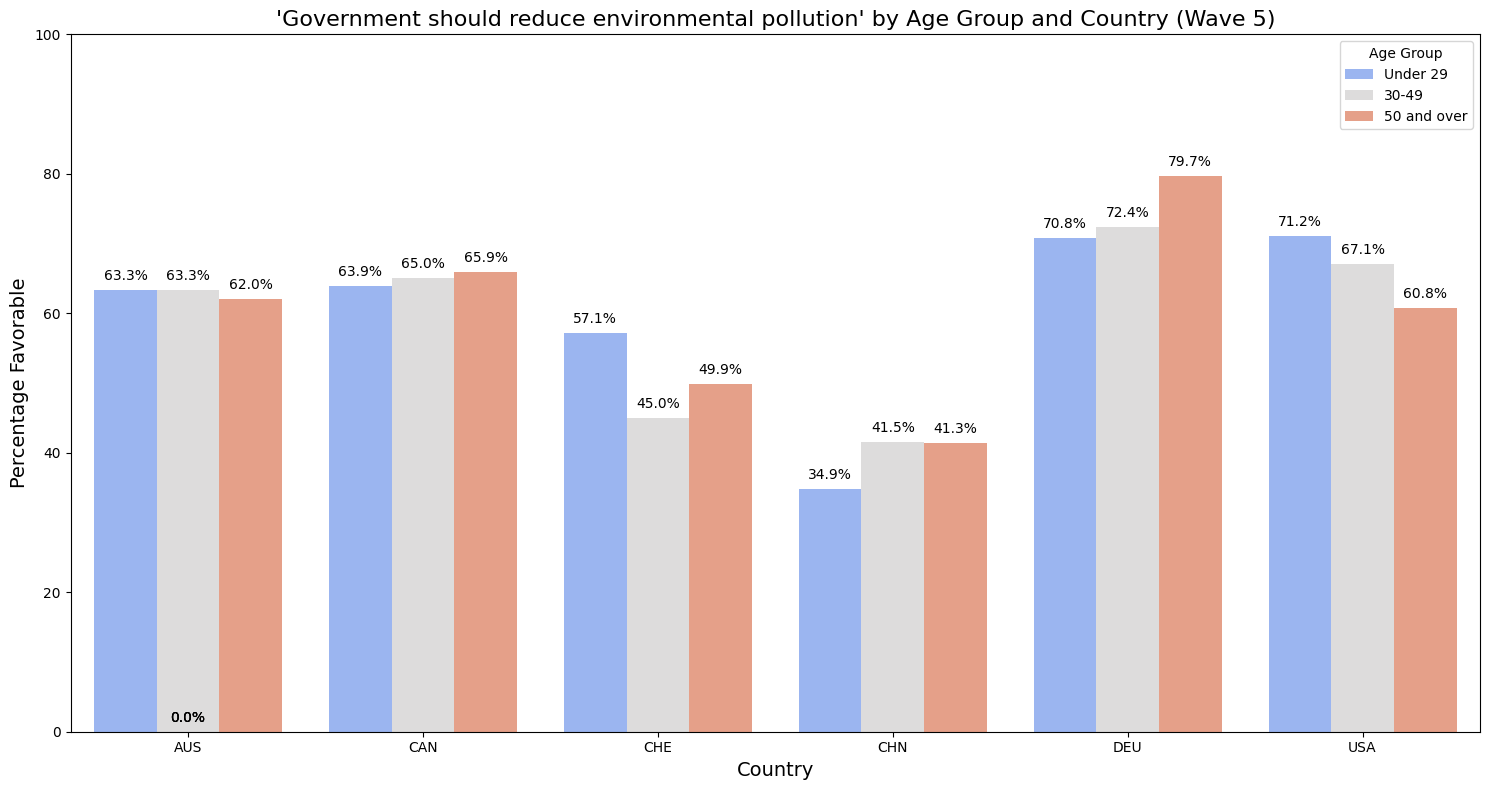

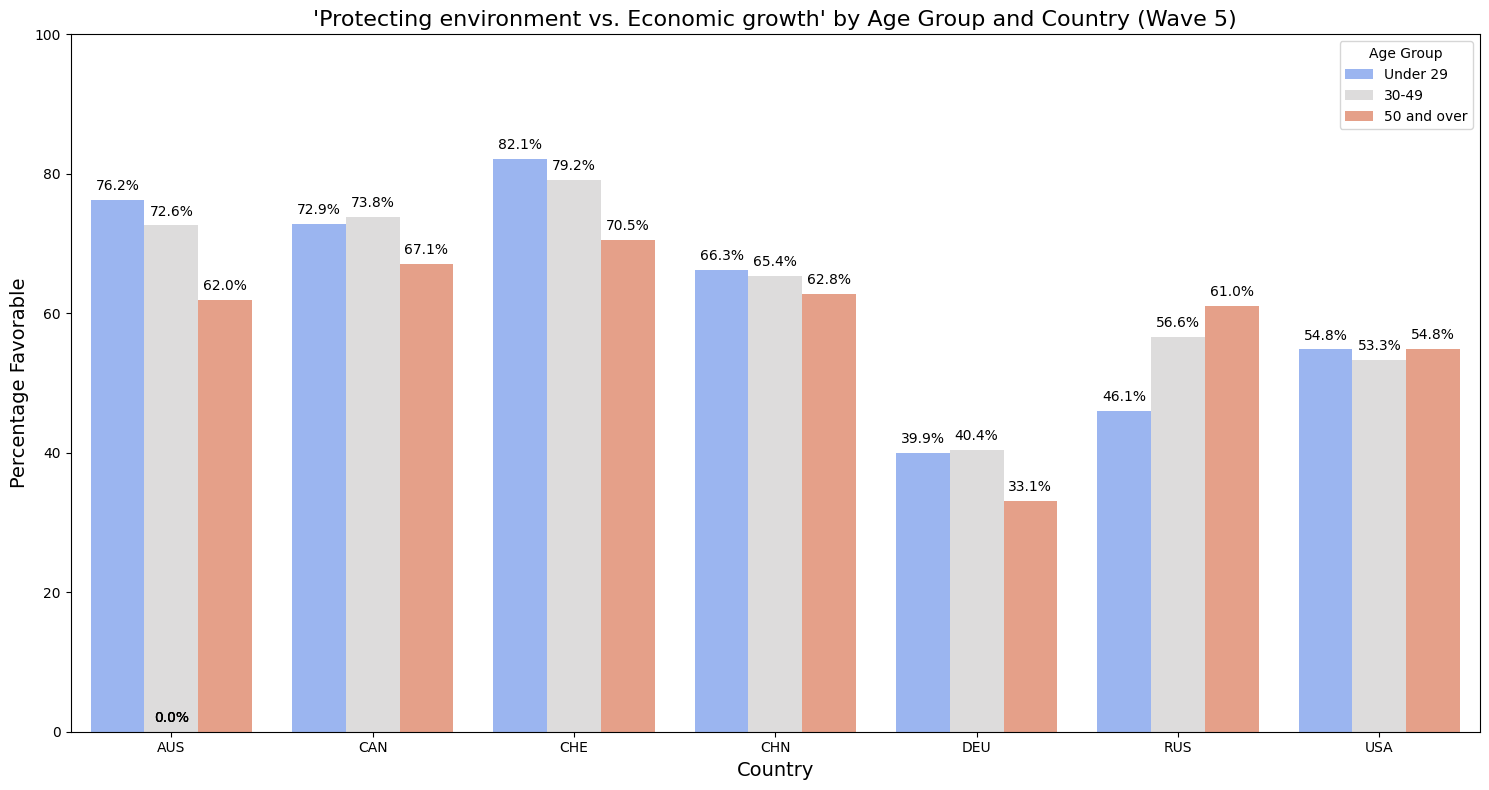

In [6]:
# Define variables and filters
wave_to_analyze = 5
age_group_mapping = {1: 'Under 29', 2: '30-49', 3: '50 and over'}

for variable_to_analyze in env_vars:
    # Filter data for the specific wave, countries, and positive responses
    filtered_data = WVS[
        (WVS['S002VS'] == wave_to_analyze) & 
        (WVS['COUNTRY_ALPHA'].isin(selected_countries_alpha)) & 
        (WVS[variable_to_analyze] > 0)  # Keep only positive responses
    ].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Reverse the scale (4 becomes best, 1 becomes worst) for the variable to analyze
    filtered_data.loc[:, 'Transformed_Response'] = filtered_data[variable_to_analyze].apply(
        lambda x: 5 - x if pd.notna(x) else pd.NA
    )

    # Filter age groups (1 = under 29, 2 = 30-49, 3 = 50 and over)
    filtered_data = filtered_data[filtered_data['X003R2'].isin([1, 2, 3])]

    # Group by country and age group
    grouped_data = filtered_data.groupby(['COUNTRY_ALPHA', 'X003R2'])['Transformed_Response'].agg(
        # Use only "4" for B008, else count both "3" and "4"
        favorable_count=lambda x: (
            (x == 4).sum() if variable_to_analyze == "B008" else (x.isin([3, 4])).sum()
        ),
        total_count='count'
    ).reset_index()

    # Calculate percentage favorable
    grouped_data['Percentage Favorable'] = (grouped_data['favorable_count'] / grouped_data['total_count']) * 100

    # Rename columns for clarity
    grouped_data.columns = ['Country', 'Age Group', 'Favorable Count', 'Total Respondents', 'Percentage Favorable']

    # Map age groups to descriptive labels
    grouped_data['Age Group'] = grouped_data['Age Group'].map(age_group_mapping)

    # Retrieve descriptive name for the variable
    variable_name = next((mapping[variable_to_analyze] for mapping in env_var_mapping if variable_to_analyze in mapping), variable_to_analyze)

    # Plot the results as a grouped bar plot
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(
        data=grouped_data,
        x='Country',
        y='Percentage Favorable',
        hue='Age Group',
        palette='coolwarm'  # Choose a palette for age groups
    )

    # Add labels with values next to the bars
    for bar in ax.patches:
        # Get the x and y coordinates of the bar
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        
        # Add the percentage value as text
        ax.text(x, y + 1, f"{y:.1f}%", ha='center', va='bottom', fontsize=10)

    # Customize the plot
    plt.title(f"'{variable_name}' by Age Group and Country (Wave {wave_to_analyze})", fontsize=16)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel("Percentage Favorable", fontsize=14)
    plt.ylim(0, 100)
    plt.legend(title="Age Group", loc='upper right')
    plt.tight_layout()
    plt.show()


Key Observations:
Graph 1: 'Would give part of my income for the environment'

China leads across all age groups, showing consistent commitment to contributing financially to environmental causes.
Australia's youth (Under 29) has a significant drop-off, highlighting potential generational disinterest or financial constraints.
Older age groups (50 and over) in most countries seem slightly less inclined, but the difference is minimal.
Graph 2: 'Increase in taxes if used to prevent environmental pollution'

A notable divide is visible between China, which shows the highest favorability, and countries like Germany and USA, where responses drop significantly.
The under 29 group in Australia is again absent or highly unfavorable, perhaps pointing to skepticism or economic concerns among younger generations.
Middle-aged and older age groups are more aligned across countries like Canada and Switzerland, suggesting broader acceptance within these cohorts.
Graph 3: 'Government should reduce environmental pollution'

Favorability is relatively high across most countries, with Germany showing the steepest decline in favorability compared to other questions.
Youth responses are consistently robust, except in Russia and USA, where generational alignment varies.
Graph 4: 'Protecting environment vs. Economic growth'

This graph demonstrates the most divergence between countries and age groups:
Switzerland displays the highest favorable responses, even across age groups.
Germany and Russia exhibit the lowest favorability, likely reflecting skepticism towards prioritizing the environment over economic growth.
The gap between younger and older generations is prominent in countries like China and Russia, which could signal differing priorities based on generational experience.
Insights Across All Graphs:
Generational Differences:

Younger respondents tend to align more strongly with environmental protection, though exceptions exist (e.g., Australia under 29).
Older respondents may show slight declines in favorability but remain reasonably supportive.
Country-Specific Trends:

China emerges as a leader in favorability across most graphs, reflecting strong national narratives around environmental action.
Germany and USA often display lower favorability, suggesting economic concerns or political hesitations in these regions.
Question-Specific Impact:

Support for financial contributions and taxes (Graphs 1 and 2) is lower than for governmental responsibility (Graph 3), reflecting a possible expectation for systemic solutions over individual costs.

# Exploring CO2 Emission Levels

In this chapter, we will shift our focus to exploring CO2 emissions across different countries. 

The aim is to understand the actual environmental impact by analyzing:

Annual CO2 Emissions by Country: We will look at the total annual CO2 emissions for each country, providing an overview of their contribution to global emissions.
Sector-Wise CO2 Emissions: This section will also break down emissions by sector (such as energy, transport, industry) to identify the primary sources of emissions in each country.
Trends Over Time: By examining how CO2 emissions have changed over the years, we can identify which countries have made significant progress in reducing emissions and which are still facing challenges.

This analysis will help us correlate public sentiment about environmental issues (explored in the previous chapter) with the actual carbon footprints of different nations.

In [7]:
# Load the co2 CSV file
co2_data = pd.read_csv('data/co2-data.csv')

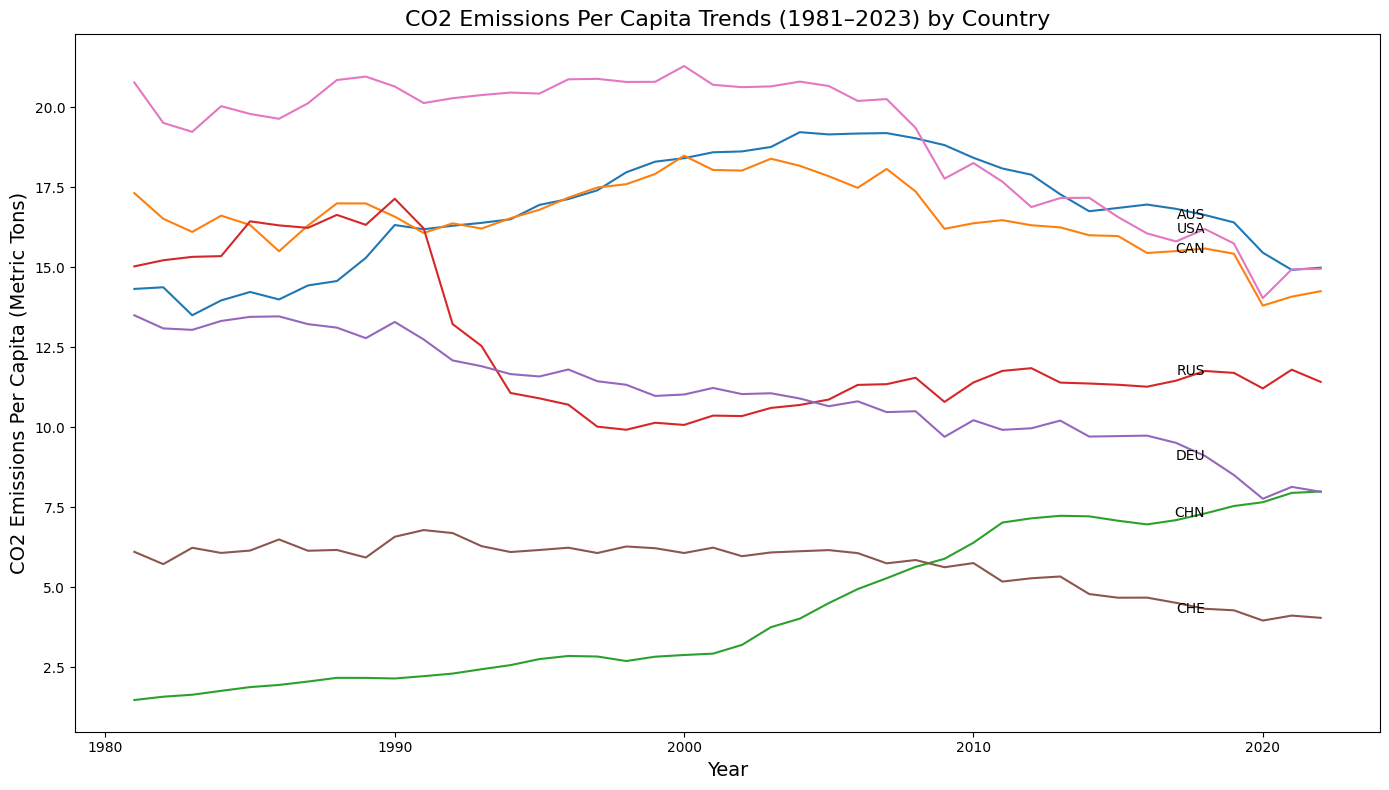

In [8]:
import matplotlib.pyplot as plt

# From 1981 to 2023 inclusive
year_range = range(1981, 2024)  

# Filter data for selected countries and years
filtered_co2_data = co2_data[
    (co2_data['iso_code'].isin(selected_countries_alpha)) & 
    (co2_data['year'].isin(year_range))
].copy()

# Plot CO2 emissions per capita trends (1981–2023)
plt.figure(figsize=(14, 8))
for country in selected_countries_alpha:
    country_data = filtered_co2_data[filtered_co2_data['iso_code'] == country]
    plt.plot(
        country_data['year'], 
        country_data['co2_per_capita'],  # CO2 emissions per capita
        label=country
    )
    # Add country code next to the value of the year 2018
    year_2018_data = country_data[country_data['year'] == 2018]
    if not year_2018_data.empty:
        plt.text(
            year_2018_data['year'].values[0], 
            year_2018_data['co2_per_capita'].values[0], 
            f"{country}", 
            fontsize=10, 
            verticalalignment='center', 
            horizontalalignment='right'
        )

# Customize the plot
plt.title("CO2 Emissions Per Capita Trends (1981–2023) by Country", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 Emissions Per Capita (Metric Tons)", fontsize=14)
plt.grid(False)  # Disable the grid
plt.tight_layout()
plt.show()


## Key Observations:

General Decline in Developed Countries:

Countries like the USA, Canada (CAN), Australia (AUS), and Germany (DEU) have seen a consistent decrease in CO2 emissions per capita since the early 2000s. This suggests a significant effort to mitigate emissions, likely through policies promoting renewable energy, efficiency improvements, and transitions away from coal and other fossil fuels. The USA, in particular, showed a marked decrease after around 2007, possibly due to shifts in energy policies, the adoption of natural gas, and advancements in renewable technologies.
Russia (RUS):

Russia exhibits a sharp decline in emissions in the early 1990s. This is likely linked to the collapse of the Soviet Union, which led to economic disruptions and reduced industrial activity, contributing to decreased emissions per capita. Following this drop, emissions have remained relatively stable.
China (CHN):

China displays a steady increase in CO2 emissions per capita starting in the early 2000s, reflecting rapid industrialization and economic growth during that period. The rate of increase has slowed slightly in recent years, which could be due to China's focus on adopting renewable energy and stricter environmental policies.
Switzerland (CHE):

Switzerland has the lowest emissions per capita among the countries represented here, and the trend has remained relatively stable over the years. This reflects Switzerland's reliance on renewable energy, such as hydroelectric power, and proactive environmental policies.

Australia (AUS) and Canada (CAN):

Australia and Canada have followed similar trends over time, with relatively high emissions per capita but showing a gradual decrease since around 2005. These reductions may be attributed to national climate policies, the introduction of carbon pricing mechanisms, and the gradual shift towards renewables.

Key Insights:

Policy Impact: The decline in emissions for many countries coincides with periods of increased environmental regulation and policy intervention, suggesting that government actions have had a tangible impact on reducing carbon footprints.
Industrialization Effect: In contrast, China's upward trend in emissions per capita underscores the environmental cost of rapid industrial growth, particularly when relying heavily on coal and other fossil fuels.
Stable Emissions in Certain Countries: Countries like Switzerland have managed to keep emissions consistently low, highlighting effective and sustainable energy strategies.

## Key Insights for the Storyline:
Public Sentiment and Environmental Action:

The data shows variations in public willingness to contribute financially for environmental protection, support for increased taxes to prevent pollution, and expectations for government action. China consistently shows high levels of public willingness to act, while Germany and USA exhibit more variability.
Highlight the contrast between countries with declining support over survey waves, such as USA and Russia, and those maintaining or even increasing support, such as China and Canada.
Generational Insights:

Across many countries, older age groups (50 and over) often express higher support for environmental actions, whether through taxation or personal financial contributions. This suggests that older individuals are more willing to prioritize environmental issues, possibly due to heightened awareness of climate impacts over their lifetime.
Countries like China and Canada show consistently high support across all age groups, highlighting national attitudes that align strongly with environmental priorities.
Perceived Role of Government:

There is a strong sentiment across countries that government should play a central role in reducing environmental pollution, with countries like Germany showing high levels of agreement.
Conversely, in countries like Russia and China, there appears to be a decline in support for government-led pollution control, possibly indicating either policy fatigue or dissatisfaction with government actions so far.
Environmental Protection vs. Economic Growth:

The debate between protecting the environment and fostering economic growth is prominent, with countries like China, Switzerland, and Australia favoring environmental protection more consistently over the years.
In Germany and Russia, preferences seem to shift, reflecting the challenge of balancing economic demands with environmental needs, especially in countries with significant industrial sectors.
CO2 Emissions Context:

The CO2 emissions trends provide crucial context for understanding public sentiment. Countries like USA and Germany have seen reductions in emissions in recent decades, and this can be linked to increasing environmental awareness and corresponding policies.
The rise in emissions for countries like China suggests that while public support for environmental action is high, economic growth and industrialization still present challenges for reducing the actual carbon footprint.

Note to myself: 

Overall - declinig support for taxing individually however still high proportion of support. Except Germany. China all ages are highly supporting this. Germany only third of respondenst in age groups support this. Western world around 70%. Same as tax same as part of income. 

Governbement should reduce:  now germany hihest in favor with over 70% in youth support. China and russia is on the lower side (scared of governamnet?) Overall still high support for this in Western world.

Prootectinig environment is strong support in WVS. Over 50% except Russia. Youth is not supporting it in Ger and rus. 

Co2 emmision: CHina rising plus highest population on top. AUS USA CAN GER is high but declinig. (LETS SEE THE TAXATION AND RENBEWABLES.) Switzeland is low and declining.


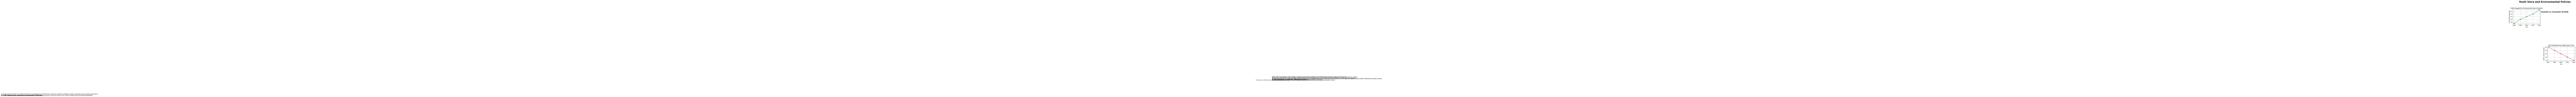

In [9]:
import matplotlib.pyplot as plt

# Create A4-sized figure for the visualization
fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 size in inches (A4 dimensions)
ax.axis('off')  # Hide the axes

# Title of the infographic
plt.text(0.5, 1.05, "Youth Voice and Environmental Policies", fontsize=20, fontweight='bold', ha='center')

# Section 1: Protecting Environment vs. Economic Growth
plt.text(0.05, 0.92, "1. Protecting the Environment vs. Economic Growth", fontsize=14, fontweight='bold')

# Add a graph representing public sentiment (Protecting Environment vs Economic Growth)
growth_years = [2000, 2005, 2010, 2015, 2020]
growth_support = [55, 58, 60, 62, 65]

ax1 = fig.add_axes([0.05, 0.70, 0.4, 0.15])  # Position for the graph
ax1.plot(growth_years, growth_support, marker='o', linestyle='-', color='green')
ax1.set_title("Public Support for Environment Over Economy")
ax1.set_xlabel("Year")
ax1.set_ylabel("% Favorable Response")
ax1.grid(True)

# Text on the right side of the graph
plt.text(0.5, 0.75, 
         "Over the past two decades, the sentiment towards prioritizing the environment over economic growth has steadily increased, especially among younger generations.\n"
         "The data indicates a growing awareness of the importance of sustainable practices, driven by concerns over climate change and environmental degradation.",
         fontsize=10, wrap=True)

# Section 2: CO2 Emissions and Policies
plt.text(0.05, 0.52, "2. CO2 Emissions and Environmental Policies", fontsize=14, fontweight='bold')

# Add a graph representing CO2 emissions trends
co2_years = [1981, 1990, 2000, 2010, 2020]
co2_emissions = [20, 18, 16, 14, 12]

ax2 = fig.add_axes([0.55, 0.32, 0.4, 0.15])  # Position for the CO2 graph
ax2.plot(co2_years, co2_emissions, marker='o', linestyle='-', color='red')
ax2.set_title("CO2 Emissions Per Capita Over Time")
ax2.set_xlabel("Year")
ax2.set_ylabel("Metric Tons Per Capita")
ax2.grid(True)

# Text on the left side of the CO2 emissions graph
plt.text(0.05, 0.35,
         "While public sentiment has been shifting towards environmental protection, government actions have also played a critical role.\n"
         "Policies like carbon pricing and renewable energy incentives have contributed to a steady decline in CO2 emissions over the past four decades.\n"
         "This section explores how well public demand aligns with tangible government actions.",
         fontsize=10, wrap=True)

# Section 3: Resolution of the Story
plt.text(0.05, 0.15, "3. Resolution: A Call for Unified Action", fontsize=14, fontweight='bold')

# Add concluding text at the bottom of the infographic
plt.text(0.05, 0.10,
         "The voice of the youth is clear: there is strong support for prioritizing environmental protection, even at the cost of economic growth.\n"
         "Governments need to continue to align their policies with the public's desire for sustainable development. By bridging the gap between public sentiment and policy action,\n"
         "we can create a future where economic growth and environmental sustainability go hand in hand.",
         fontsize=11, wrap=True)

# Adding a note for data sources
plt.text(0.5, 0.02, "* Data Sources: World Values Survey, Global Carbon Atlas, OECD", fontsize=9, ha='center')

# Show the plot
plt.show()
